In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pathlib import Path

In [53]:
working_dir = r"C:\Users\User\Desktop\R_PCA"
tdTomato_37Degree_file = Path(working_dir) / "tdTomato_37D_Features_SVMPredicted_23DEC2020.csv"
HaloTagKera_37Degree_file = Path(working_dir) / "HaloTagKera_37D_Features_SVMPredicted_23DEC2020.csv"

tdTomato_37Degree = pd.read_csv(tdTomato_37Degree_file, sep=" ")
HaloTagKera_37Degree = pd.read_csv(HaloTagKera_37Degree_file, sep=" ")

data = pd.concat([tdTomato_37Degree, HaloTagKera_37Degree])

# these are the feature columns
mycols = range(3, 10)

scaler = StandardScaler()
scaler.fit(data.iloc[:, mycols])
X=scaler.transform(data.iloc[:, mycols])  

# compute PCAs
pca = PCA(n_components = 7)
mypca = pca.fit_transform(X)

cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
idxn = ['NetDispl', 'Straight', 'Bending', 'Efficiency', 'Asymmetry', 'radiusGyration', 'fracDimension']
pca_components = pd.DataFrame(pca.components_.T, columns=cols, index=idxn)
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
NetDispl,0.468551,0.146777,0.225270,-0.051755,-0.125337,-0.529466,-0.639881
Straight,-0.416244,0.306969,0.181044,0.269822,-0.602099,-0.430297,0.281515
Bending,0.233249,-0.649869,-0.201952,0.664905,-0.166411,-0.110670,0.021021
Efficiency,0.327280,0.251991,0.658508,0.405583,-0.001601,0.468306,0.109292
Asymmetry,0.166679,0.630003,-0.609043,0.419999,0.150684,0.049990,-0.052702
radiusGyration,0.485232,0.036558,0.032888,-0.153787,0.258972,-0.433261,0.695485
fracDimension,-0.427143,-0.012559,0.264658,0.343324,0.710141,-0.335765,-0.111523


<AxesSubplot:title={'center':'PC1 Loadings'}>

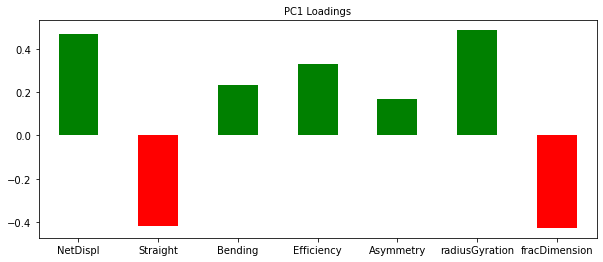

In [73]:
pc_axis = "PC1"

fig = plt.figure(figsize=(10,4))
plt.title(f"{pc_axis} Loadings", size=10)
pca_components[pc_axis].plot(kind='bar', color=(pca_components[pc_axis] > 0).map({True: 'g', False: 'r'}), rot=0)